In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

Dimensions:  (128, 160)


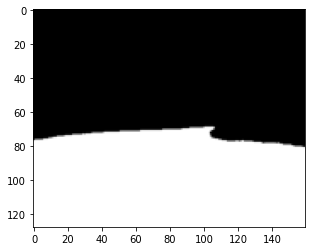

In [4]:
# Load a Road Map
im: Image.Image = Image.open('output/map/img56_m.png')
(width, height) = (im.width // 2, im.height // 2)
im = np.array(im.resize((width, height)))
print('Dimensions: ', im.shape)
plt.imshow(im, cmap='gray')
plt.show()

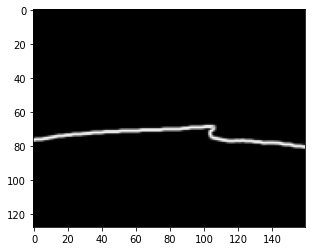

In [5]:
# Use edge detection on the image
from skimage import filters
edge_sobel = filters.sobel(im)
plt.imshow(edge_sobel, cmap='gray')

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from skimage import filters

import glob
from tqdm import tqdm

# Get all edge pictures
num_images = len(glob.glob('output/map/img*_m.png'))
image_names = ['output/map/img{num}_m.png'.format(num = n) for n in range(1, num_images + 1)]

for image in tqdm(image_names):
    file_name = os.path.basename(image)[:-6]
    
    # Load a road map
    im: Image.Image = Image.open(image)
    (width, height) = (im.width // 2, im.height // 2)
    im = np.array(im.resize((width, height)))

    # Use edge detector
    edge_sobel = filters.sobel(im)
    edge_sobel *= 255
    edge_sobel = edge_sobel.astype(np.uint8)
    edge_PIL = Image.fromarray(edge_sobel)
    edge_PIL.save('output_edges/' + file_name + '_e.png')



100%|██████████| 3601/3601 [00:09<00:00, 390.80it/s]
